In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [64]:
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully.")
        print(f"Dataset shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Load the diabetic readmission dataset
data_path = "diabetic_data.csv"
df = load_data(data_path)

print("\nCOLUMN DATA TYPES:")
print(df.dtypes.value_counts())

print("\nBASIC STATISTICS:")
print(df.describe())

df.head()


Data loaded successfully.
Dataset shape: (101766, 50)

COLUMN DATA TYPES:
object    37
int64     13
Name: count, dtype: int64

BASIC STATISTICS:
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000  

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO



MISSING VALUES ANALYSIS

Missing Values Summary:
           Column  Missing_Count  Missing_Percentage
           weight          98569           96.858479
    max_glu_serum          96420           94.746772
        A1Cresult          84748           83.277322
medical_specialty          49949           49.082208
       payer_code          40256           39.557416
             race           2273            2.233555
           diag_3           1423            1.398306
           diag_2            358            0.351787
           diag_1             21            0.020636


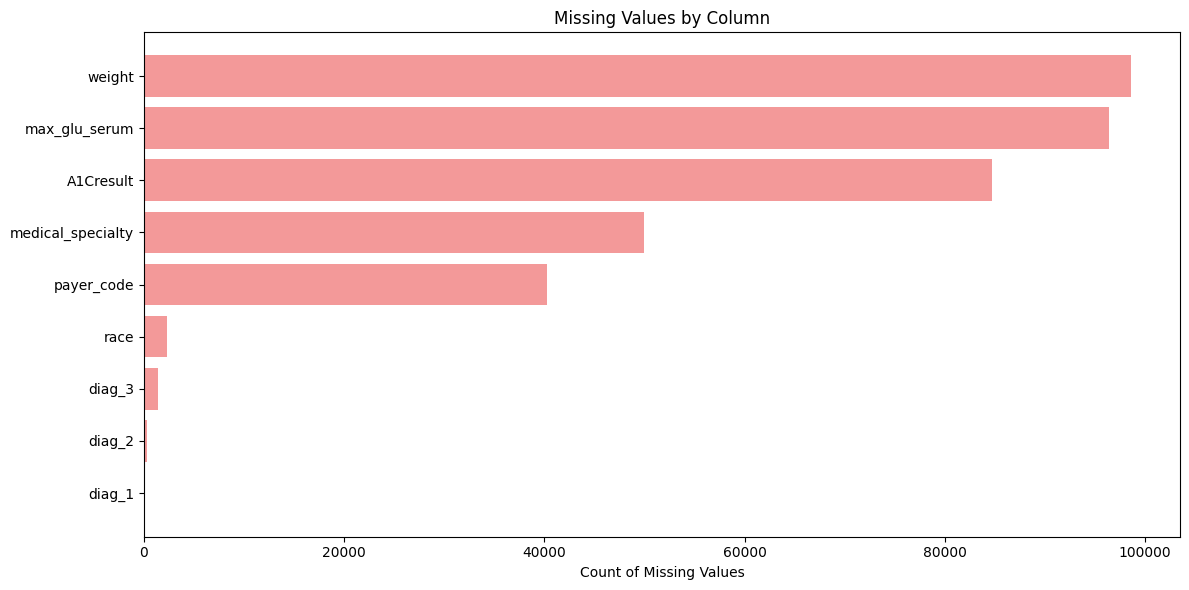

(        encounter_id  patient_nbr             race  gender      age weight  \
 0            2278392      8222157        Caucasian  Female   [0-10)    NaN   
 1             149190     55629189        Caucasian  Female  [10-20)    NaN   
 2              64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
 3             500364     82442376        Caucasian    Male  [30-40)    NaN   
 4              16680     42519267        Caucasian    Male  [40-50)    NaN   
 ...              ...          ...              ...     ...      ...    ...   
 101761     443847548    100162476  AfricanAmerican    Male  [70-80)    NaN   
 101762     443847782     74694222  AfricanAmerican  Female  [80-90)    NaN   
 101763     443854148     41088789        Caucasian    Male  [70-80)    NaN   
 101764     443857166     31693671        Caucasian  Female  [80-90)    NaN   
 101765     443867222    175429310        Caucasian    Male  [70-80)    NaN   
 
         admission_type_id  discharge_disposition_

In [65]:
# =====================================
# MISSING VALUES ANALYSIS
# =====================================

def analyze_missing_values(df):
    """Comprehensive missing values analysis"""
    print("\n" + "="*50)
    print("MISSING VALUES ANALYSIS")
    print("="*50)

     # Replace '?' with np.nan for true missing value detection
    df = df.replace('?', np.nan).copy()
    
    # Calculate missing values
    missing_data = df.isnull().sum()
    missing_percent = 100 * missing_data / len(df)
    
    # Create missing values summary
    missing_summary = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percentage': missing_percent.values
    })
    missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    # Step 5: Display summary
    if missing_summary.empty:
        print("✅ No missing values found in the dataset.")
    else:
        print("\nMissing Values Summary:")
        print(missing_summary.to_string(index=False))
    
        # Step 6: Visualize missing values
        plt.figure(figsize=(12, 6))
        plt.barh(
            missing_summary['Column'], 
            missing_summary['Missing_Count'], 
            color='lightcoral', alpha=0.8
        )
        plt.xlabel('Count of Missing Values')
        plt.title('Missing Values by Column')
        plt.gca().invert_yaxis()  # Show largest at top
        plt.tight_layout()
        plt.show()

    return df, missing_summary

analyze_missing_values(df)

Weight, payer code, medical specialty have significant percentage of missing values. These are hard to be imputed for effective analysis so dropping those. For missing values of race, imputing them with "unknown". For missing values of diagnosis, imputing them "missing". For missing A1C result, imputing them with "No Test taken" and for missing max_glu_serum, imputing them with "No Test taken".

In [66]:
# Drop payer code, weight, medical speciality
df.drop(columns=['payer_code'], inplace=True)  
df.drop(columns=['weight'], inplace=True)  
df.drop(columns=['medical_specialty'], inplace=True)  
df['race'] = df['race'].fillna('Unknown')
df['A1Cresult'] = df['A1Cresult'].replace({
    np.nan: 'No test',
    'None': 'No test'
})
df['max_glu_serum'] = df['max_glu_serum'].replace({
    np.nan: 'No test',
    'None': 'No test'
})
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].fillna('Missing')

### TARGET VARIABLE ANALYSIS


Analyzing the target variable, readmitted. Readmitted is a categorical variable with 3 levels: >30, <30, and NO. For value based care, we care if they are readmitted within 30 days. So converting the target variable to a binary variable.


TARGET VARIABLE ANALYSIS
Original Target Variable Distribution:
  NO: 54,864 (53.91%)
  >30: 35,545 (34.93%)
  <30: 11,357 (11.16%)

Binary Target Variable Distribution (Focus: <30 days):
  0 (NO or >30): 90,409 (88.84%)
  1 (<30): 11,357 (11.16%)


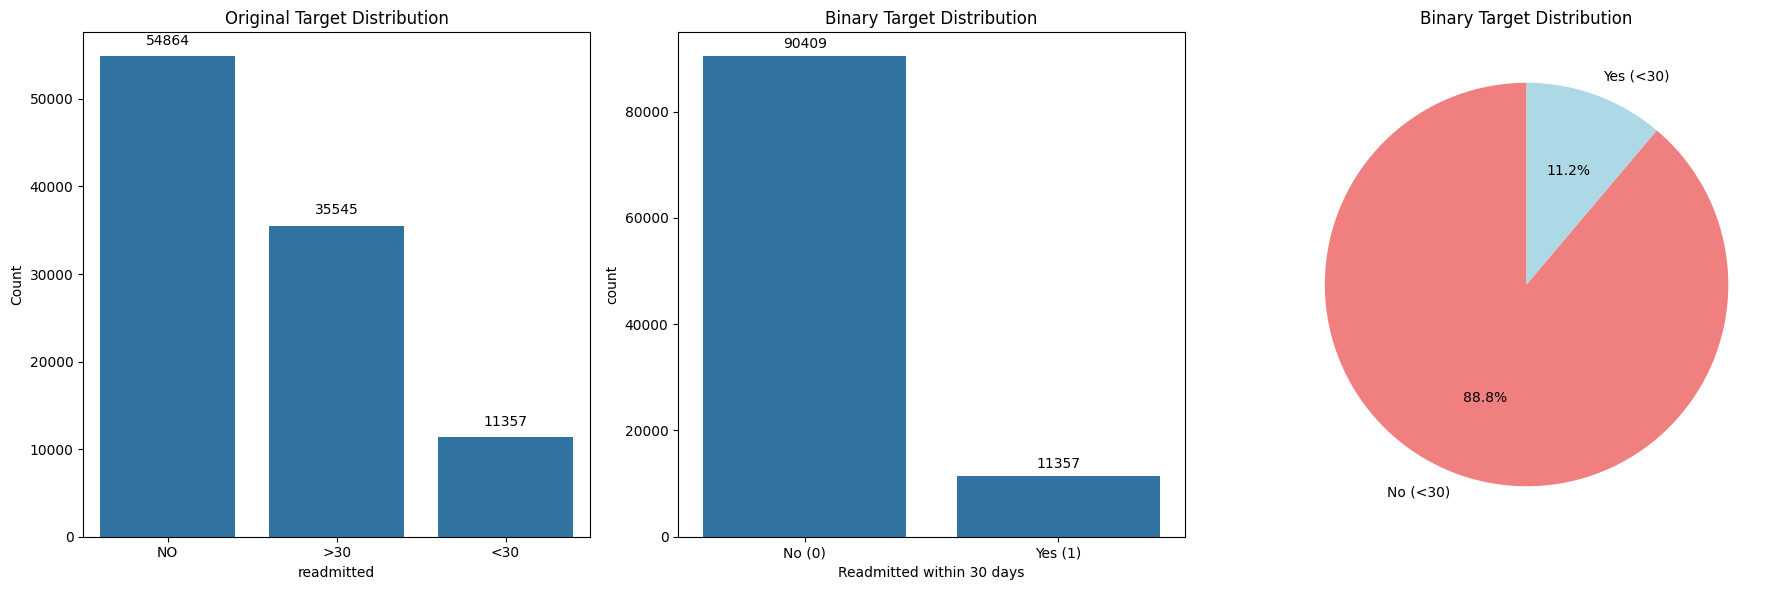

In [67]:


def analyze_target_variable(df, target_col='readmitted'):
    """Analyze the target variable distribution"""
    print("\n" + "="*50)
    print("TARGET VARIABLE ANALYSIS")
    print("="*50)
    
    # Original target variable distribution
    target_counts = df[target_col].value_counts()
    target_percentages = df[target_col].value_counts(normalize=True) * 100
    
    print("Original Target Variable Distribution:")
    for value in target_counts.index:
        print(f"  {value}: {target_counts[value]:,} ({target_percentages[value]:.2f}%)")
    
    # Create binary target: 1 for <30 (readmitted within 30 days), 0 for others
    df['readmitted_binary'] = (df[target_col] == '<30').astype(int)
    
    # Binary target distribution
    binary_counts = df['readmitted_binary'].value_counts()
    binary_percentages = df['readmitted_binary'].value_counts(normalize=True) * 100
    
    print("\nBinary Target Variable Distribution (Focus: <30 days):")
    print(f"  0 (NO or >30): {binary_counts[0]:,} ({binary_percentages[0]:.2f}%)")
    print(f"  1 (<30): {binary_counts[1]:,} ({binary_percentages[1]:.2f}%)")
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Original distribution
    sns.countplot(data=df, x=target_col, ax=axes[0])
    axes[0].set_title('Original Target Distribution')
    axes[0].set_ylabel('Count')
    for i, v in enumerate(target_counts.values):
        axes[0].text(i, v + 1000, str(v), ha='center', va='bottom')
    
    # Binary distribution
    sns.countplot(data=df, x='readmitted_binary', ax=axes[1])
    axes[1].set_title('Binary Target Distribution')
    axes[1].set_xlabel('Readmitted within 30 days')
    axes[1].set_xticklabels(['No (0)', 'Yes (1)'])
    for i, v in enumerate(binary_counts.values):
        axes[1].text(i, v + 1000, str(v), ha='center', va='bottom')
    
    # Pie chart for binary
    axes[2].pie(binary_counts.values, labels=['No (<30)', 'Yes (<30)'], 
               autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    axes[2].set_title('Binary Target Distribution')
    
    plt.tight_layout()
    plt.show()
        
    return target_counts, binary_counts

# Run target variable analysis
if df is not None:
    target_analysis, binary_analysis = analyze_target_variable(df)

The dataset is severely imbalanced with only ~11% of the patients readmitted to the hospital within 30 days. Balancing techniques will need to be used to address this.

## Understanding Numerical variables


NUMERICAL VARIABLES ANALYSIS
Numerical columns (9): ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted_binary']

Statistical Summary:
       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count         101766.00           101766.00       101766.00        101766.00   
mean               4.40               43.10            1.34            16.02   
std                2.99               19.67            1.71             8.13   
min                1.00                1.00            0.00             1.00   
25%                2.00               31.00            0.00            10.00   
50%                4.00               44.00            1.00            15.00   
75%                6.00               57.00            2.00            20.00   
max               14.00              132.00            6.00            81.00   

       number_outpatie

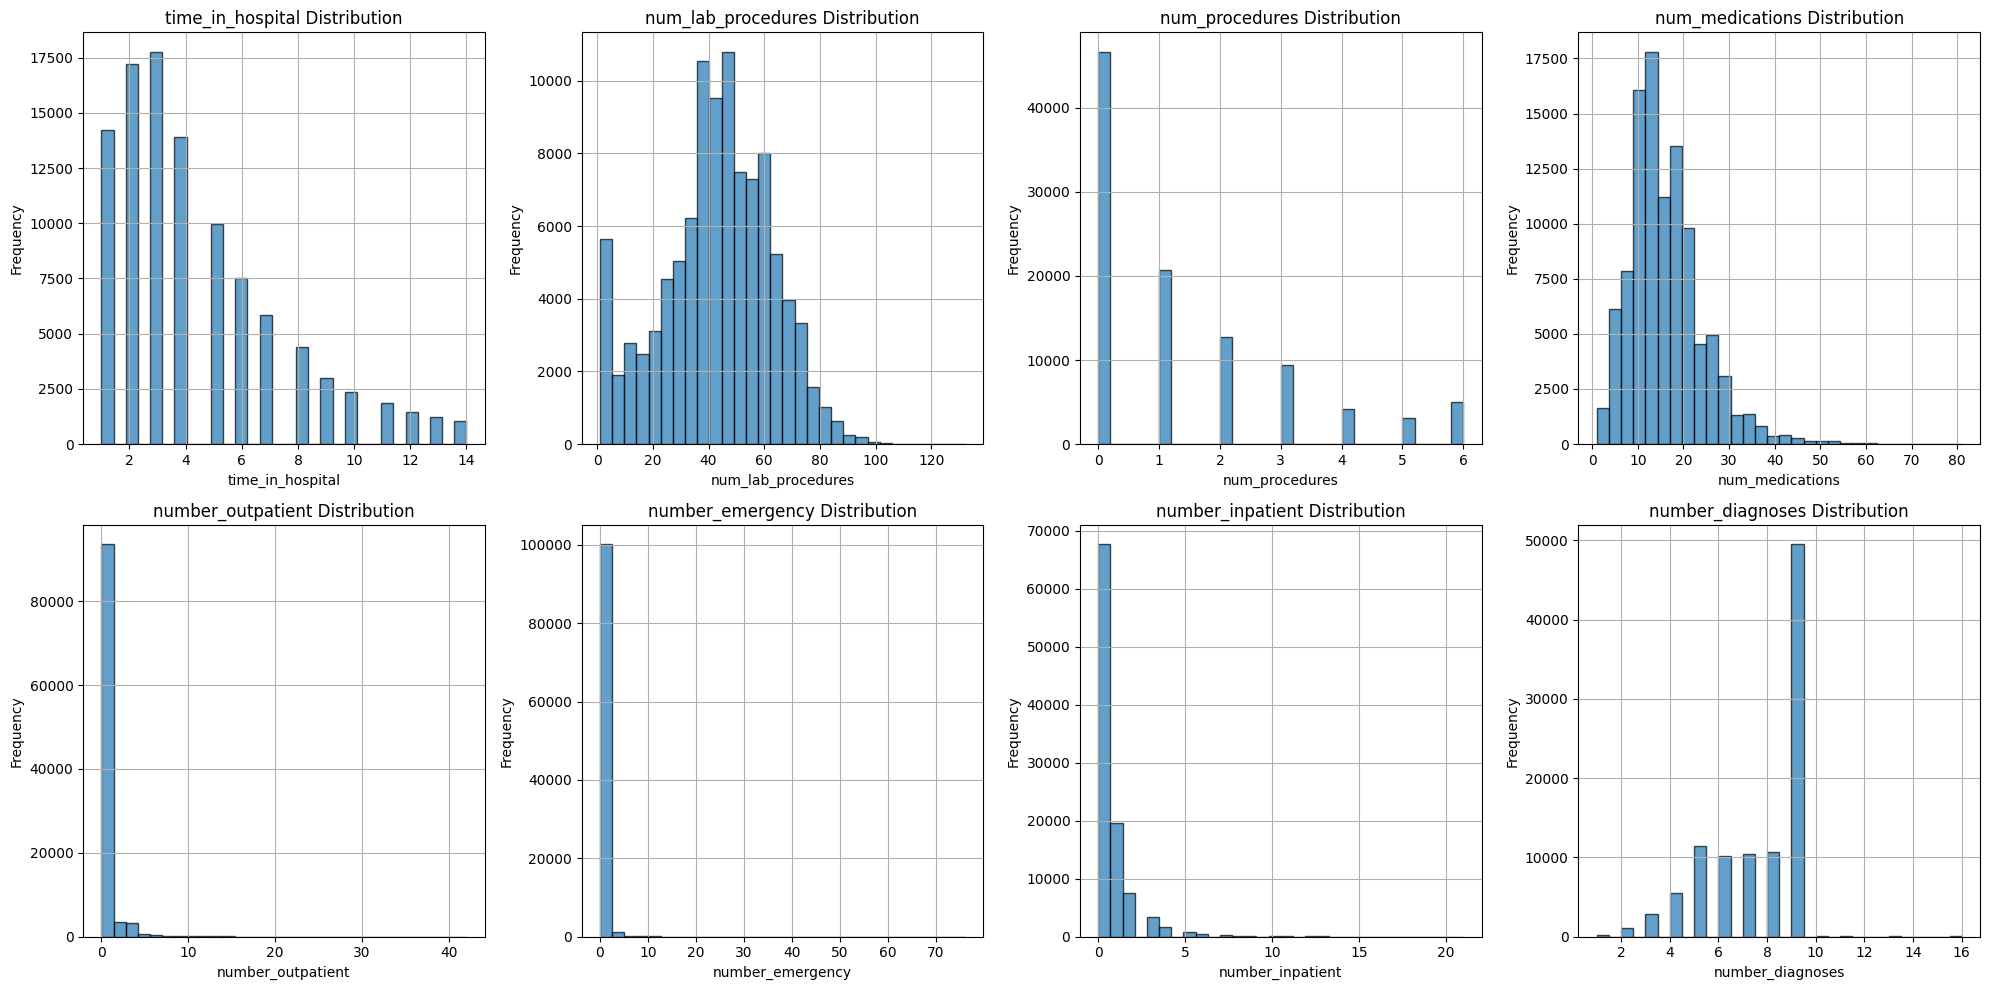

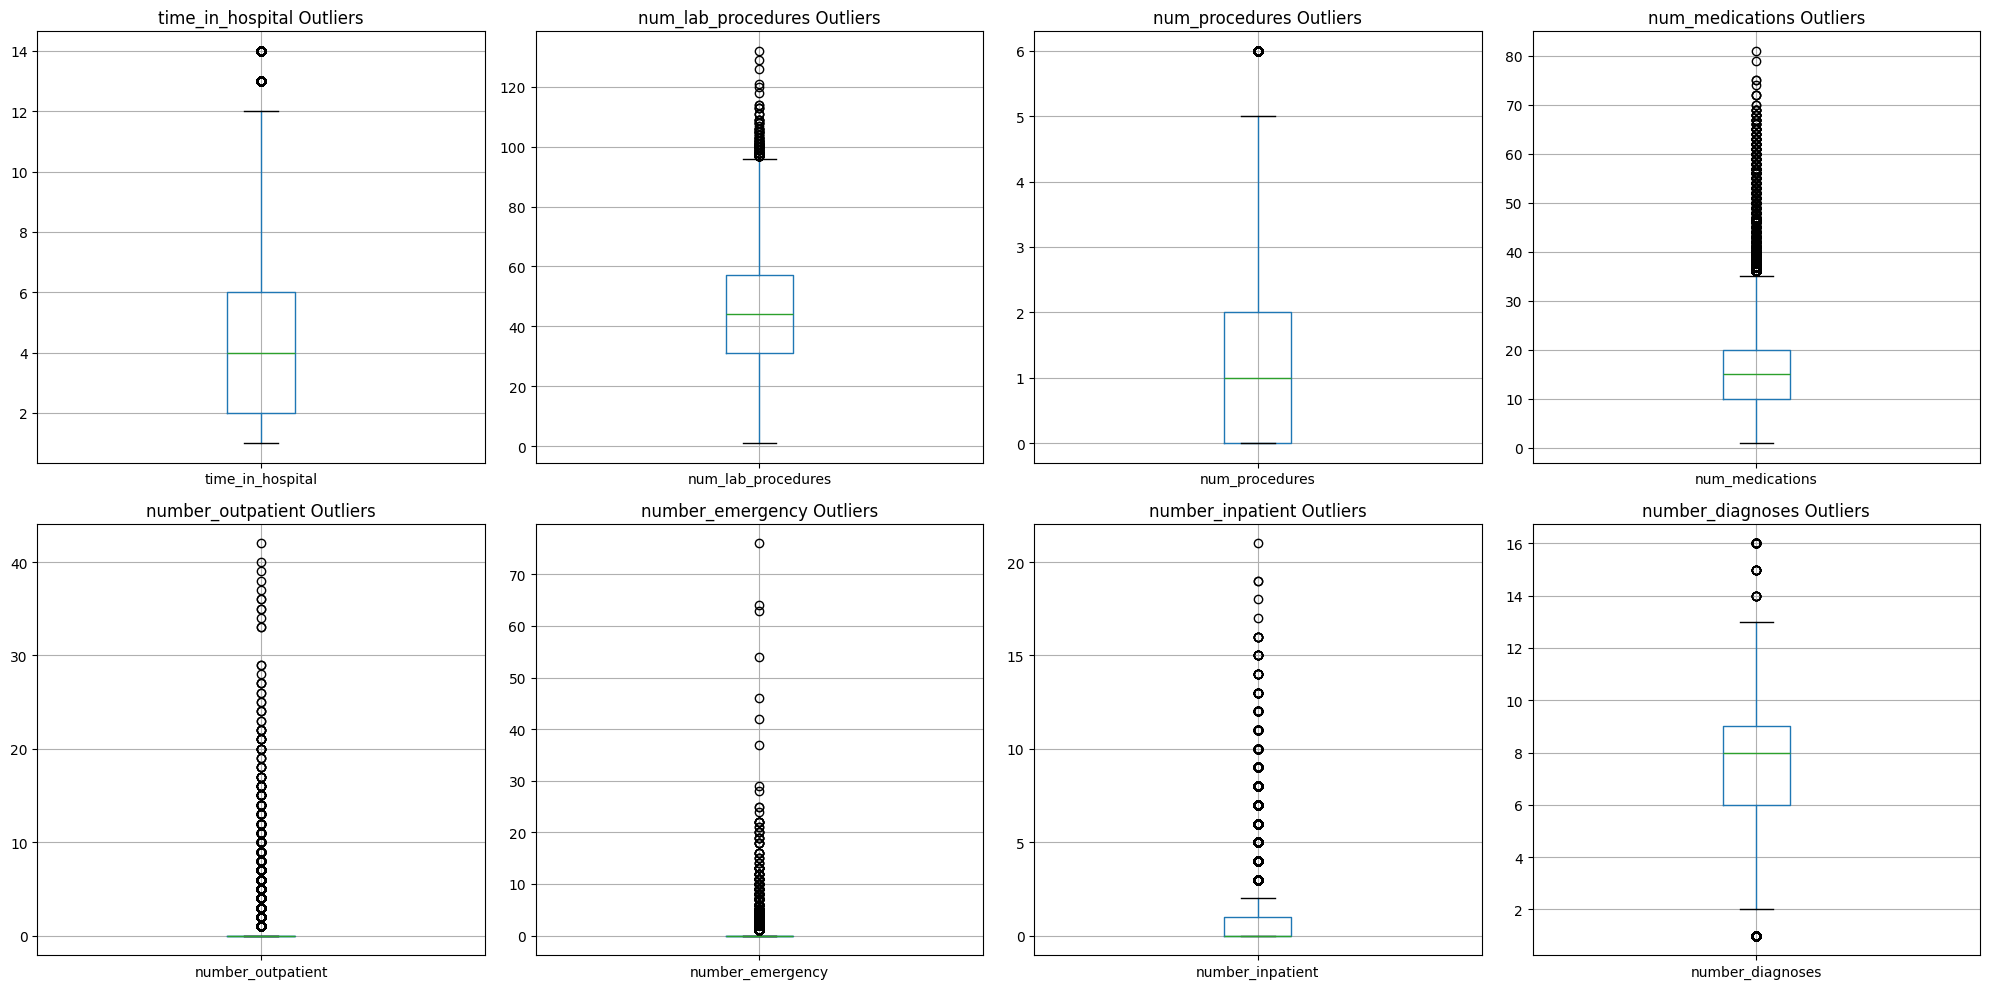

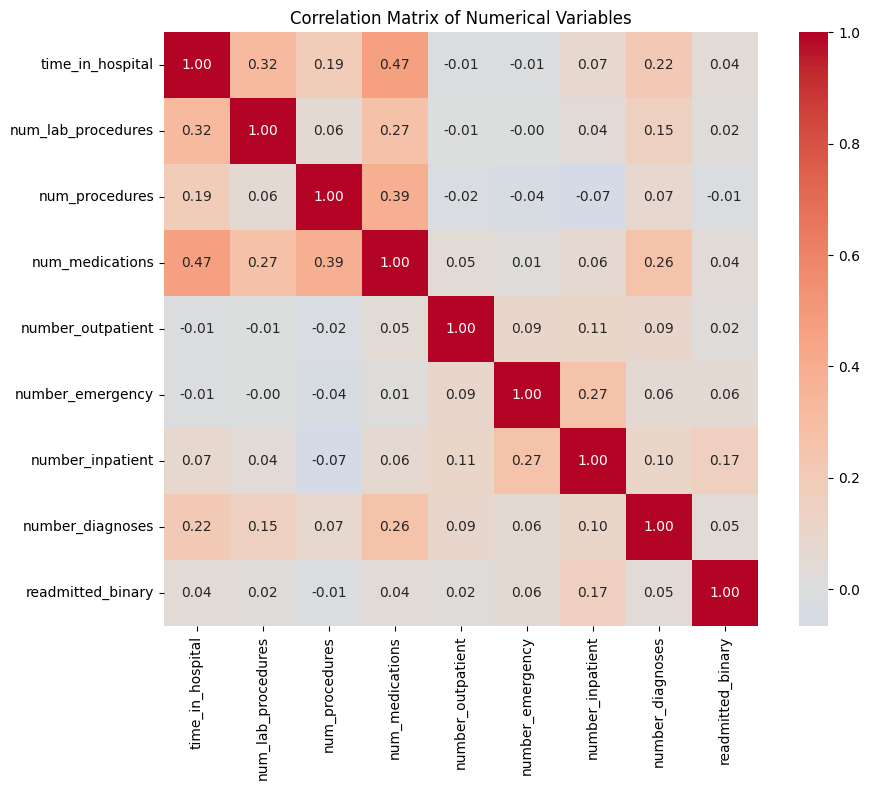

In [68]:

def analyze_numerical_variables(df):
    """Analyze numerical variables for modeling insights"""
    print("\n" + "="*50)
    print("NUMERICAL VARIABLES ANALYSIS")
    print("="*50)
    
    # Identify numerical columns (exclude ID columns)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_cols = [col for col in numerical_cols if 'id' not in col.lower() and 'nbr' not in col.lower()]
    
    print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
    
    # Statistical summary
    print("\nStatistical Summary:")
    print(df[numerical_cols].describe().round(2))
    
    # Distribution plots
    n_cols = len(numerical_cols)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Box plots for outlier detection
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'{col} Outliers')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    return numerical_cols

# Run numerical analysis
if df is not None:
    numerical_features = analyze_numerical_variables(df)

### Numerical Variables Key Insights

The target variable shows the strongest correlation with the following features (in descending order):
number_inpatient, number_emergency, number_diagnoses, time_in_hospital, and num_medications.

The length of hospital stay is typically short, with the majority of patients staying between 2 to 4 days.

The number of inpatient visits is generally low, with the majority of patients having 0 to 2 visits

Most patients had no emergency visits recorded (number_emergency = 0).

The number of diagnoses is commonly clustered around 6 to 8 diagnoses per patient.


## Categorical Variables Analysis

In [69]:
# Map some categorical variables to named categories for easier analysis

admission_type_map = {
    1: "Emergency",
    2: "Urgent",
    3: "Elective",
    4: "Newborn",
    5: "Not Available",
    6: "NULL",
    7: "Trauma Center",
    8: "Not Mapped"
}

df['admission_type'] = df['admission_type_id'].map(admission_type_map)

discharge_disposition_map = {
    1: "Discharged to home",
    2: "To-short-term-hospital",
    3: "To SNF",
    4: "To ICF",
    5: "To other inpatient care",
    6: "Home w/ HS",
    7: "Left AMA",
    8: "Home under IV provider",
    9: "Admitted inpatient",
    10: "Neonate to another hospital",
    11: "Expired",
    12: "Still patient",
    13: "Hospice / home",
    14: "Hospice / facility",
    15: "To Medicare swing bed",
    16: "To outpatient (other inst.)",
    17: "To outpatient (this inst.)",
    18: "NULL",
    19: "Expired at home (Medicaid)",
    20: "Expired in facility (Medicaid)",
    21: "Expired, unknown place",
    22: "To rehab facility",
    23: "To long-term care hospital",
    24: "To Medicaid-only nursing",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    27: "To federal facility",
    28: "To psychiatric hospital",
    29: "To Critical Access Hospital"
}



df['discharge_disposition'] = df['discharge_disposition_id'].map(discharge_disposition_map)

# Admission Type Mapping
admission_source_map = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from hospital',
    5: 'Transfer from SNF',
    6: 'Transfer from other ',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access ',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer from another HHA',
    19: 'Readmission to same HHA',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer within same facility',
    23: 'Born inside hospital',
    24: 'Born outside hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

df['admission_source'] = df['admission_source_id'].map(admission_source_map)


In [70]:
# There are some dicharge dispositions that are not relevant to our analysis, including expired and discharged to hospice, still patient exluding those from analysis
exclude_discharge_ids = [11, 12, 13, 14, 19, 20, 21]

# Filter dataframe to exclude these discharge types
df = df[~df['discharge_disposition_id'].isin(exclude_discharge_ids)].copy()


### Diagnoses mapping and analysis
The diagnoses columns have ICD 9 codes and its large set. Mapping them to few categories will help us in analysis. As defined in the paper, https://onlinelibrary.wiley.com/doi/10.1155/2014/781670, grouping them into broader categories. 

In [72]:
import re
# Define the groups and their ICD code ranges as tuples (start, end)
# For simplicity, codes like 250.xx are treated as 250 to 250.99
# 'E' and 'V' codes handled separately

# We'll convert codes to float for numeric ranges, and handle E, V codes as special.

def icd9_to_group(code):
    if pd.isna(code):
        return 'Unknown'
    code = str(code).strip()
    
    # Handle E and V codes separately
    if code.startswith('E'):
        return 'External causes of injury and supplemental classification'
    if code.startswith('V'):
        return 'External causes of injury and supplemental classification'
    
    # Extract numeric part before decimal
    match = re.match(r'(\d+)(?:\.(\d+))?', code)
    if not match:
        return 'Other/Unknown'
    
    main_code = int(match.group(1))
    # decimal_part = match.group(2) # we might use if needed
    
    # Map ranges from your table:
    if (390 <= main_code <= 459) or main_code == 785:
        return 'Circulatory'
    elif (460 <= main_code <= 519) or main_code == 786:
        return 'Respiratory'
    elif (520 <= main_code <= 579) or main_code == 787:
        return 'Digestive'
    elif main_code == 250:
        return 'Diabetes'
    elif 800 <= main_code <= 999:
        return 'Injury'
    elif 710 <= main_code <= 739:
        return 'Musculoskeletal'
    elif (580 <= main_code <= 629) or main_code == 788:
        return 'Genitourinary'
    elif 140 <= main_code <= 239:
        return 'Neoplasms'
    elif main_code in [780, 781, 784] or (790 <= main_code <= 799):
        return 'Other symptoms, signs, and ill-defined conditions'
    elif (240 <= main_code <= 279) and main_code != 250:
        return 'Endocrine, nutritional, and metabolic diseases (excluding diabetes)'
    elif (680 <= main_code <= 709) or main_code == 782:
        return 'Skin and subcutaneous tissue diseases'
    elif 1 <= main_code <= 139:
        return 'Infectious and parasitic diseases'
    elif 290 <= main_code <= 319:
        return 'Mental disorders'
    elif 280 <= main_code <= 289:
        return 'Blood diseases'
    elif 320 <= main_code <= 359:
        return 'Nervous system diseases'
    elif 630 <= main_code <= 679:
        return 'Pregnancy complications'
    elif 360 <= main_code <= 389:
        return 'Sense organs diseases'
    elif 740 <= main_code <= 759:
        return 'Congenital anomalies'
    else:
        return 'Other/Unknown'

for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col + '_group'] = df[col].apply(icd9_to_group)

# Example output check:
print(df[['diag_1', 'diag_1_group', 'diag_2', 'diag_2_group', 'diag_3', 'diag_3_group']].head())

   diag_1                                       diag_1_group  diag_2  \
0  250.83                                           Diabetes       ?   
1     276  Endocrine, nutritional, and metabolic diseases...  250.01   
2     648                            Pregnancy complications     250   
3       8                  Infectious and parasitic diseases  250.43   
4     197                                          Neoplasms     157   

    diag_2_group diag_3                                       diag_3_group  
0  Other/Unknown      ?                                      Other/Unknown  
1       Diabetes    255  Endocrine, nutritional, and metabolic diseases...  
2       Diabetes    V27  External causes of injury and supplemental cla...  
3       Diabetes    403                                        Circulatory  
4      Neoplasms    250                                           Diabetes  



CATEGORICAL VARIABLES ANALYSIS
Categorical columns (39): ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type', 'discharge_disposition', 'admission_source', 'diag_1_group', 'diag_2_group', 'diag_3_group']


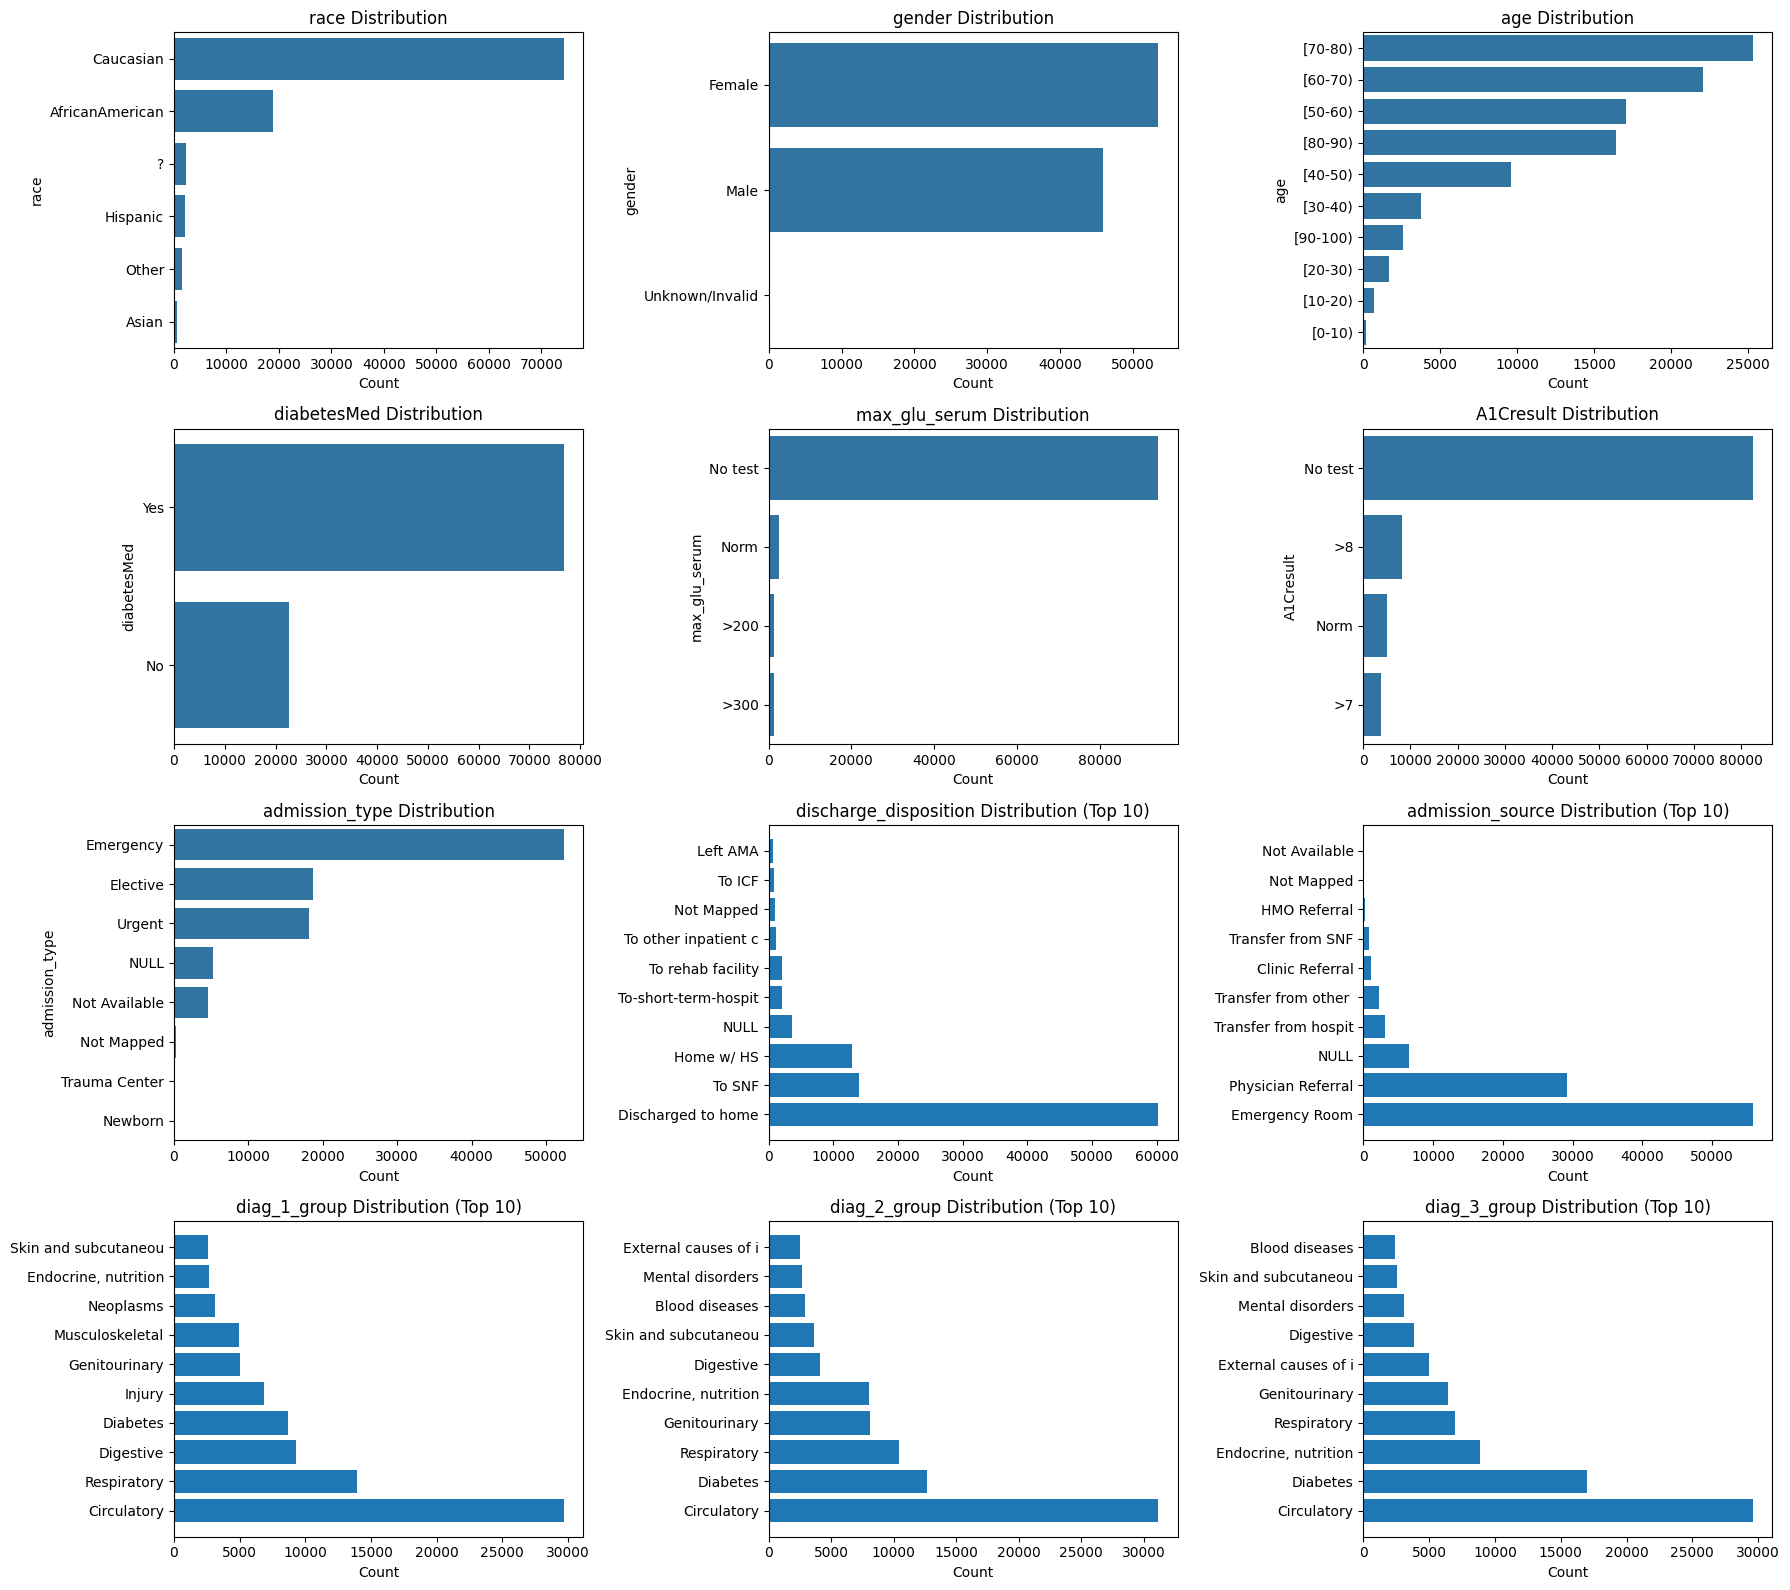

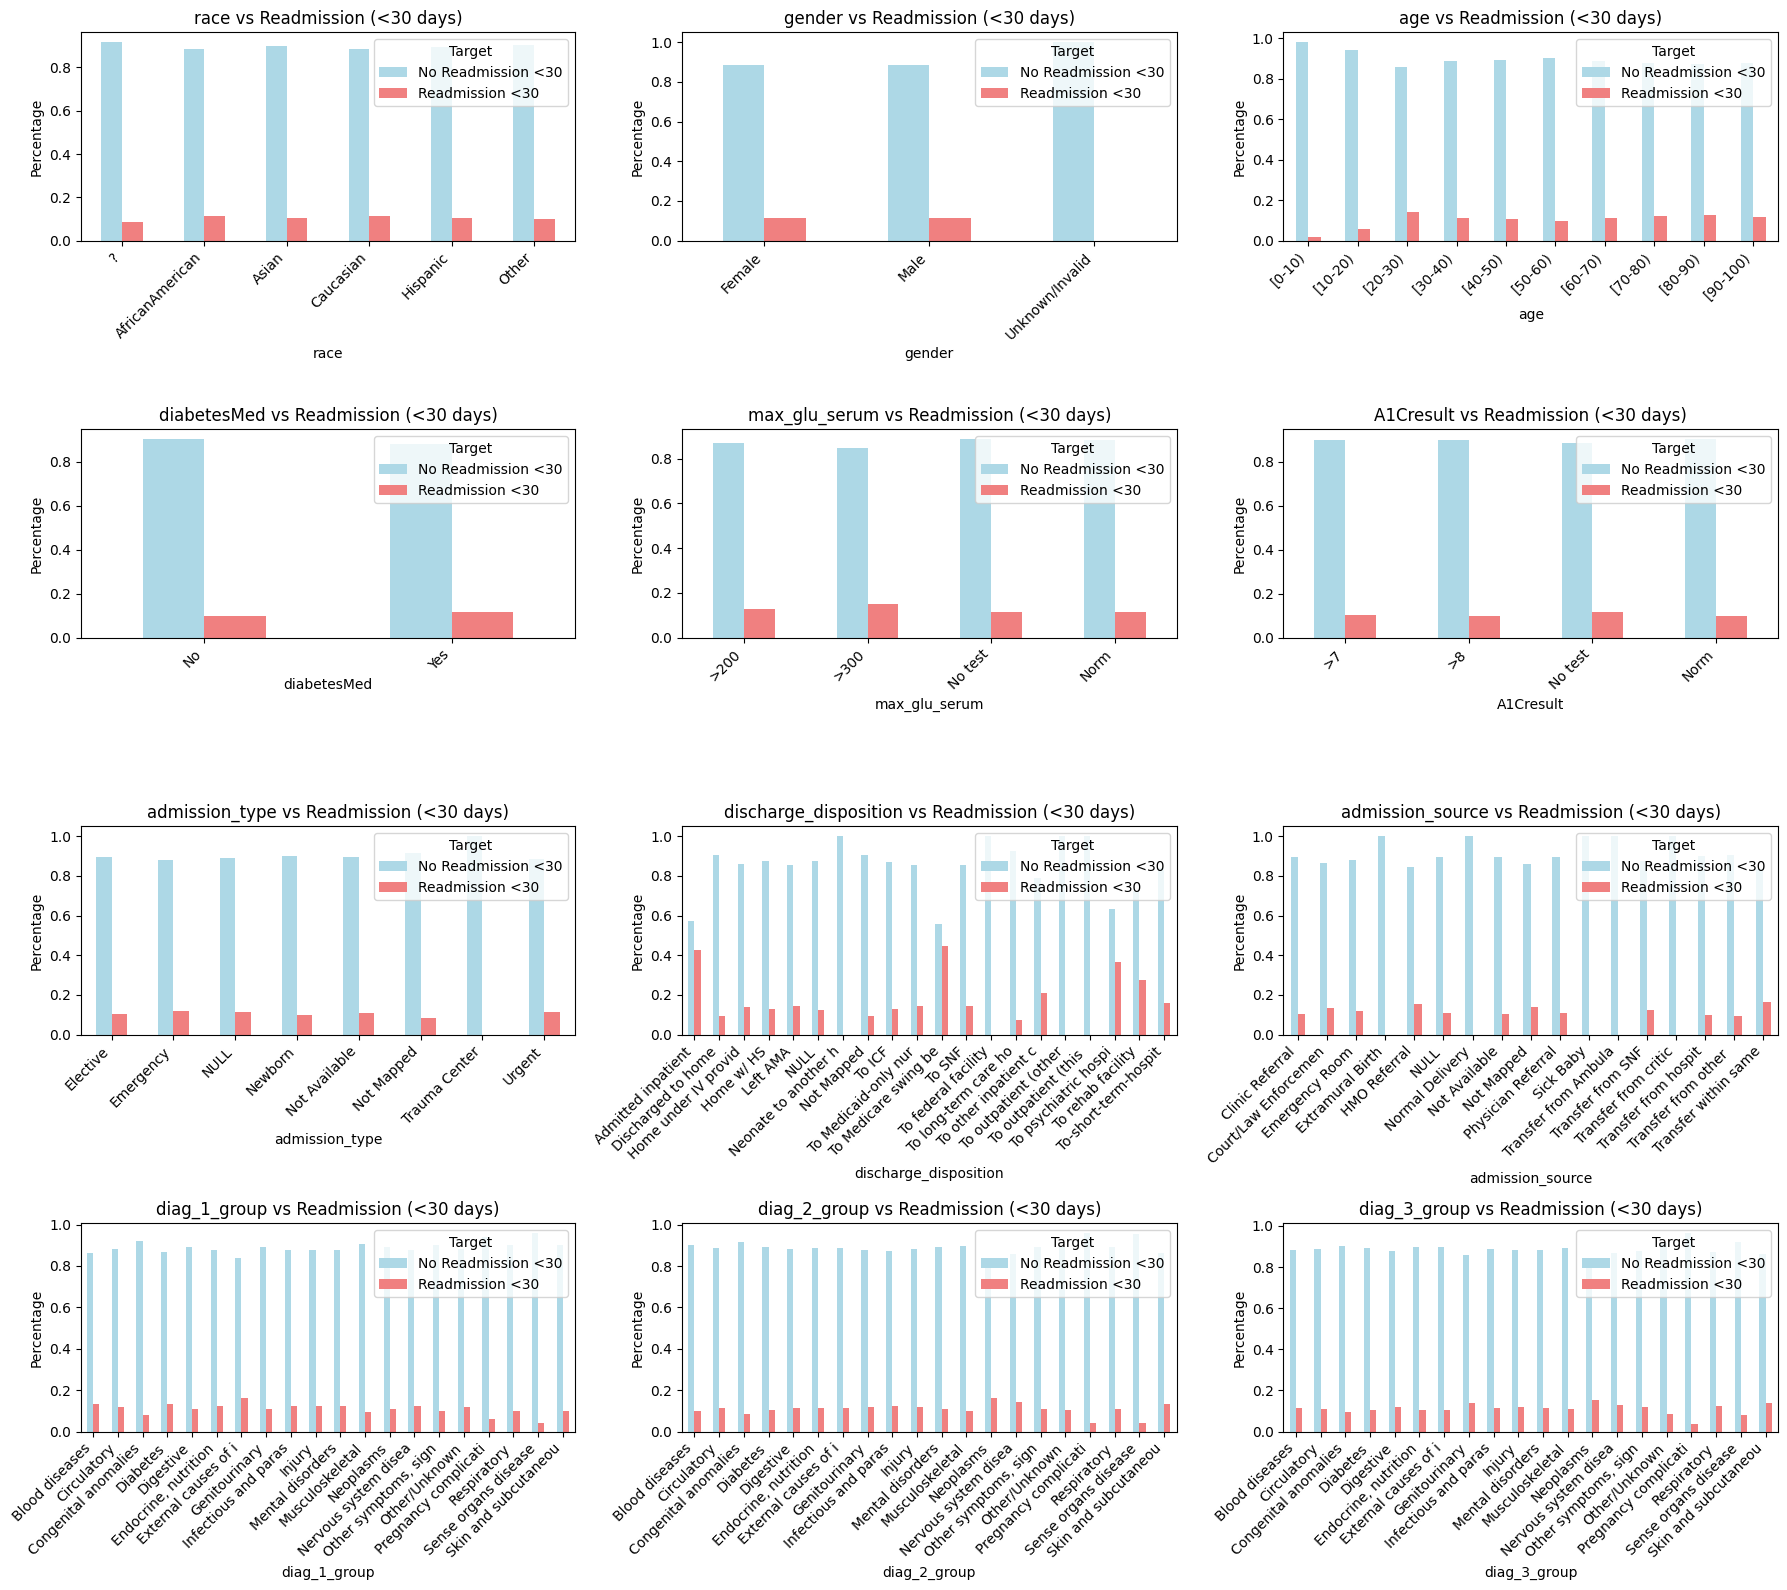


UNIQUE VALUES IN KEY CATEGORICAL COLUMNS:
  race: 6 unique values
    Values: ['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic']
  gender: 3 unique values
    Values: ['Female', 'Male', 'Unknown/Invalid']
  age: 10 unique values
    Values: ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
  diabetesMed: 2 unique values
    Values: ['No', 'Yes']
  max_glu_serum: 4 unique values
    Values: ['No test', '>300', 'Norm', '>200']
  A1Cresult: 4 unique values
    Values: ['No test', '>7', '>8', 'Norm']
  admission_type: 8 unique values
    Values: ['NULL', 'Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available', 'Not Mapped', 'Trauma Center']
  discharge_disposition: 20 unique values
  admission_source: 17 unique values
  diag_1_group: 20 unique values
  diag_2_group: 20 unique values
  diag_3_group: 20 unique values


In [78]:
def analyze_categorical_variables(df, target_col='readmitted_binary'):
    """Analyze categorical variables for modeling insights"""
    print("\n" + "="*50)
    print("CATEGORICAL VARIABLES ANALYSIS")
    print("="*50)
    
    # Identify categorical columns (exclude target)
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col not in ['readmitted', target_col]]
    
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
    # Analyze key categorical variables for modeling
    key_categorical = ['race', 'gender', 'age', 'diabetesMed', 'max_glu_serum', 'A1Cresult', 'admission_type', 'discharge_disposition', 
    'admission_source', 'diag_1_group', 'diag_2_group', 'diag_3_group']
    
    # Distribution plots
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.ravel()
    
    for i, col in enumerate(key_categorical):
        if col in df.columns and i < len(axes):
            value_counts = df[col].value_counts()
            
            if len(value_counts) <= 15:  # Only plot if not too many categories
                sns.countplot(data=df, y=col, ax=axes[i], order=value_counts.index[:10])
                axes[i].set_title(f'{col} Distribution')
                axes[i].set_xlabel('Count')
            else:
                # For columns with many categories, show top 10
                top_values = value_counts.head(10)
                axes[i].barh(range(len(top_values)), top_values.values)
                axes[i].set_yticks(range(len(top_values)))
                axes[i].set_yticklabels(top_values.index)
                axes[i].set_title(f'{col} Distribution (Top 10)')
                axes[i].set_xlabel('Count')
                            # Truncate x-tick labels to 20 characters
                yticks = axes[i].get_yticklabels()
                axes[i].set_yticklabels([tick.get_text()[:20] for tick in yticks])

    
    plt.tight_layout()
    plt.show()
    
    # Relationship with BINARY target variable (<30 days readmission)
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.ravel()
    
    for i, col in enumerate(key_categorical):
        if col in df.columns and i < len(axes):
            # Create crosstab showing readmission rates by category (binary)
            crosstab = pd.crosstab(df[col], df[target_col], normalize='index') 
            crosstab.plot(kind='bar', ax=axes[i], 
                         color=['lightblue', 'lightcoral'])
            axes[i].set_title(f'{col} vs Readmission (<30 days)')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Percentage')
            axes[i].legend(['No Readmission <30', 'Readmission <30'], title='Target')
            axes[i].tick_params(axis='x', rotation=45)
            # Truncate x-tick labels to 20 characters
            xticks = axes[i].get_xticklabels()
            axes[i].set_xticklabels([tick.get_text()[:20] for tick in xticks], rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Print unique values for modeling consideration
    print("\nUNIQUE VALUES IN KEY CATEGORICAL COLUMNS:")
    for col in key_categorical:
        if col in df.columns:
            unique_count = df[col].nunique()
            print(f"  {col}: {unique_count} unique values")
            if unique_count <= 10:
                print(f"    Values: {df[col].unique().tolist()}")
    
    return categorical_cols

# Run categorical analysis
if df is not None:
    categorical_features = analyze_categorical_variables(df)

### Categorical Variables Key Insights
The majority of patients are Caucasian, followed by African American and Hispanic. 

Most patients fall into older age groups, particularly those above middle age, which is consistent with the higher prevalence of diabetes among older adults. 

The most common admission type is emergency, indicating that many patients are entering the hospital due to acute or unplanned health events rather than scheduled care.

A notably high proportion of readmitted patients were discharged to a Medicare swing bed, suggesting that patients transitioning to skilled nursing care may be at elevated risk for early readmission.

Most Diagnosis codes are circulatory, diabetes related and respitory. With the readmitted population, neoplasms are common for secondary and third diagnosis.

## Medication analysis

There are many medication features that indicate whether a drug was prescribed to the patient or whether was change in dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed. We will use only medications that have least 1000 patients to reduce noise. 


MEDICATION ANALYSIS
Top Medication Usage (patients who received each medication):
  insulin: 52,964 patients (53.32%)
  metformin: 19,844 patients (19.98%)
  glipizide: 12,531 patients (12.61%)
  glyburide: 10,523 patients (10.59%)
  pioglitazone: 7,255 patients (7.30%)
  rosiglitazone: 6,304 patients (6.35%)
  glimepiride: 5,122 patients (5.16%)
  repaglinide: 1,518 patients (1.53%)

Medication Impact on <30 Day Readmission:
  insulin: Used 12.4% vs Not Used 10.2% (Diff: +2.2%)
  metformin: Used 9.8% vs Not Used 11.8% (Diff: -2.0%)
  glipizide: Used 11.5% vs Not Used 11.4% (Diff: +0.2%)
  glyburide: Used 10.7% vs Not Used 11.5% (Diff: -0.7%)
  pioglitazone: Used 10.6% vs Not Used 11.4% (Diff: -0.8%)
  rosiglitazone: Used 10.5% vs Not Used 11.4% (Diff: -0.9%)
  glimepiride: Used 10.3% vs Not Used 11.4% (Diff: -1.1%)
  repaglinide: Used 13.5% vs Not Used 11.4% (Diff: +2.2%)


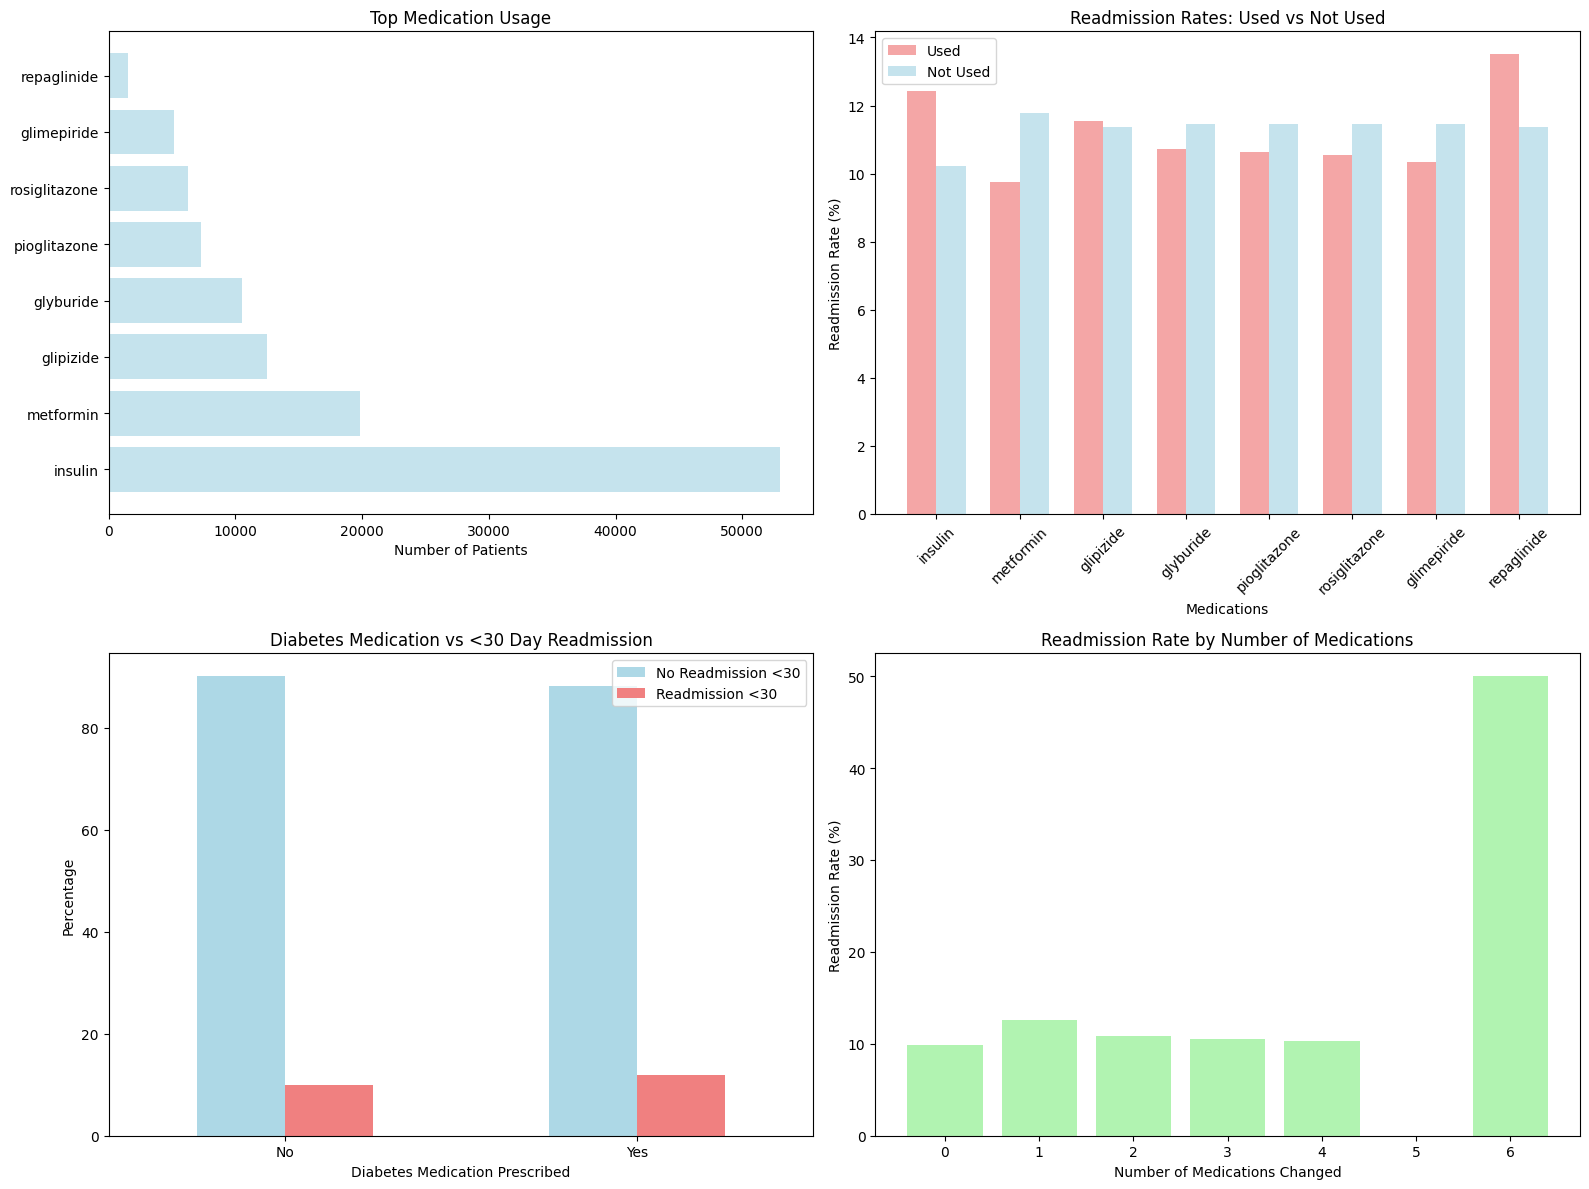

In [79]:

def analyze_medications(df, target_col='readmitted_binary'):
    """Analyze diabetes medications for modeling insights"""
    print("\n" + "="*50)
    print("MEDICATION ANALYSIS")
    print("="*50)
    
    # Identify medication columns
    medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'examide',
                       'citoglipton', 'insulin']
    
    # Count medication usage (any change from 'No')
    medication_usage = {}
    for med in medication_cols:
        if med in df.columns:
            usage_count = (df[med] != 'No').sum()
            medication_usage[med] = usage_count
    
    # Sort by usage and filter medications with reasonable usage
    sorted_meds = sorted(medication_usage.items(), key=lambda x: x[1], reverse=True)
    top_meds = [(med, count) for med, count in sorted_meds if count > 1000]  # At least 1000 patients
    
    print("Top Medication Usage (patients who received each medication):")
    for med, count in top_meds:
        percentage = (count / len(df)) * 100
        print(f"  {med}: {count:,} patients ({percentage:.2f}%)")
    
    # Medication vs readmission analysis
    print(f"\nMedication Impact on <30 Day Readmission:")
    med_impact = []
    for med, count in top_meds:
        # Calculate readmission rates
        med_used = df[df[med] != 'No'][target_col].mean() * 100
        med_not_used = df[df[med] == 'No'][target_col].mean() * 100
        difference = med_used - med_not_used
        
        med_impact.append((med, med_used, med_not_used, difference))
        print(f"  {med}: Used {med_used:.1f}% vs Not Used {med_not_used:.1f}% (Diff: {difference:+.1f}%)")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top medication usage
    meds, counts = zip(*top_meds[:8])  # Top 8
    axes[0,0].barh(meds, counts, color='lightblue', alpha=0.7)
    axes[0,0].set_xlabel('Number of Patients')
    axes[0,0].set_title('Top Medication Usage')
    
    # Medication impact on readmission
    meds_impact, used_rates, not_used_rates, differences = zip(*med_impact[:8])
    x = range(len(meds_impact))
    width = 0.35
    
    axes[0,1].bar([i - width/2 for i in x], used_rates, width, label='Used', alpha=0.7, color='lightcoral')
    axes[0,1].bar([i + width/2 for i in x], not_used_rates, width, label='Not Used', alpha=0.7, color='lightblue')
    axes[0,1].set_xlabel('Medications')
    axes[0,1].set_ylabel('Readmission Rate (%)')
    axes[0,1].set_title('Readmission Rates: Used vs Not Used')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(meds_impact, rotation=45)
    axes[0,1].legend()
    
    # Overall diabetes medication analysis
    if 'diabetesMed' in df.columns:
        diabetes_crosstab = pd.crosstab(df['diabetesMed'], df[target_col], normalize='index') * 100
        diabetes_crosstab.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'lightcoral'])
        axes[1,0].set_title('Diabetes Medication vs <30 Day Readmission')
        axes[1,0].set_xlabel('Diabetes Medication Prescribed')
        axes[1,0].set_ylabel('Percentage')
        axes[1,0].legend(['No Readmission <30', 'Readmission <30'])
        axes[1,0].tick_params(axis='x', rotation=0)
    
    # Medication count analysis
    df['med_count'] = 0
    for med in medication_cols:
        if med in df.columns:
            df['med_count'] += (df[med] != 'No').astype(int)
    
    med_count_crosstab = df.groupby('med_count')[target_col].mean() * 100
    axes[1,1].bar(med_count_crosstab.index, med_count_crosstab.values, color='lightgreen', alpha=0.7)
    axes[1,1].set_xlabel('Number of Medications Changed')
    axes[1,1].set_ylabel('Readmission Rate (%)')
    axes[1,1].set_title('Readmission Rate by Number of Medications')
    
    plt.tight_layout()
    plt.show()
    
    return top_meds, med_impact

# Run medication analysis
if df is not None:
    medication_patterns, medication_impact = analyze_medications(df)

Medication Usage and Readmission Rate Analysis:
Note: Filter of >=100 patients recommended for statistical reliability
(Small sample sizes may show misleading differences)

metformin: 19,988 patients, difference: -1.8%
repaglinide: 1,539 patients, difference: +2.2%
nateglinide: 703 patients, difference: +0.2%
chlorpropamide: 86 patients, difference: -5.4%
glimepiride: 5,191 patients, difference: -1.0%
acetohexamide: 1 patients, difference: -11.2%
glipizide: 12,686 patients, difference: +0.3%
glyburide: 10,650 patients, difference: -0.6%
tolbutamide: 23 patients, difference: -6.8%
pioglitazone: 7,328 patients, difference: -0.6%
rosiglitazone: 6,365 patients, difference: -0.8%
acarbose: 308 patients, difference: -2.1%
miglitol: 38 patients, difference: -0.6%
troglitazone: 3 patients, difference: -11.2%
tolazamide: 39 patients, difference: -3.5%
insulin: 54,383 patients, difference: +2.1%


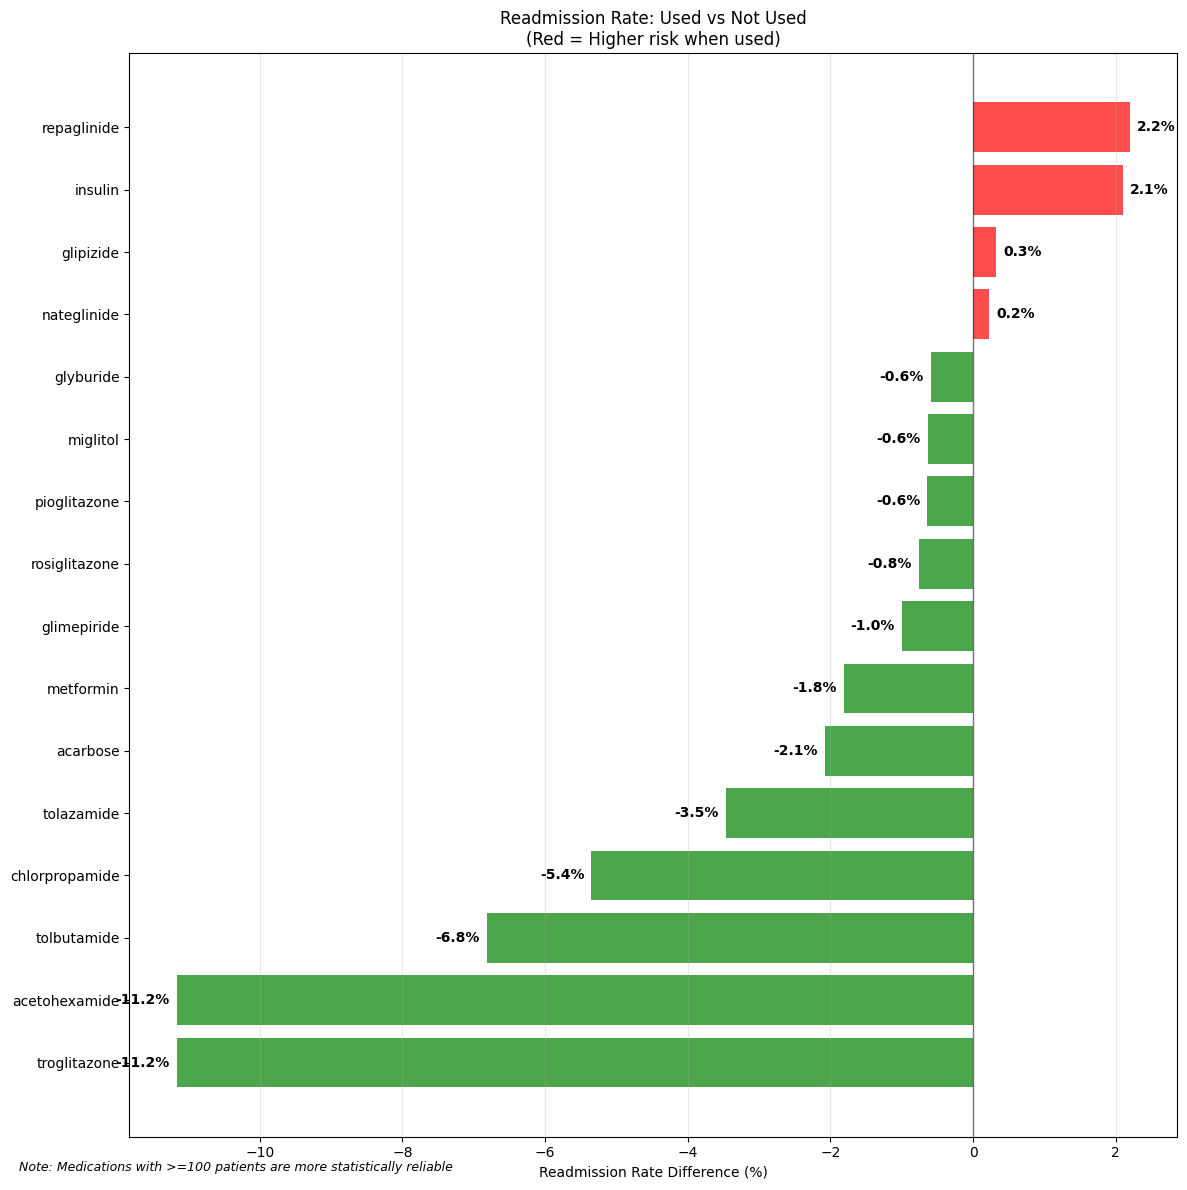


Summary: 10 medications with >=100 patients
         6 medications with <100 patients


In [ ]:
# =====================================
# MEDICATION READMISSION RATE DIFFERENCE CHART
# =====================================

def create_medication_readmission_chart(df, target_col='readmitted_binary'):
    """Create medication readmission rate difference chart"""
    
    # Medication columns
    medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'examide',
                       'citoglipton', 'insulin']
    
    # Calculate readmission rate differences for ALL medications
    med_differences = []
    
    print("Medication Usage and Readmission Rate Analysis:")
    print("Note: Filter of >=100 patients recommended for statistical reliability")
    print("(Small sample sizes may show misleading differences)\n")
    
    for med in medication_cols:
        if med in df.columns:
            # Calculate usage for all medications
            used_count = (df[med] != 'No').sum()
            
            if used_count > 0:  # Only need at least 1 patient
                # Readmission rates
                med_used_rate = df[df[med] != 'No'][target_col].mean() * 100
                med_not_used_rate = df[df[med] == 'No'][target_col].mean() * 100
                difference = med_used_rate - med_not_used_rate
                
                # Track reliability status
                reliable = used_count >= 100
                
                med_differences.append((med, difference, used_count, reliable))
                print(f"{med}: {used_count:,} patients, difference: {difference:+.1f}%")
    
    # Sort by difference
    med_differences.sort(key=lambda x: x[1])
    
    # Prepare data for plotting
    medications, differences, counts, reliability = zip(*med_differences)
    
    # Create colors: red for positive (higher risk), green for negative (lower risk)
    colors = ['green' if diff < 0 else 'red' for diff in differences]
    
    # Create the chart
    plt.figure(figsize=(12, 12))
    bars = plt.barh(medications, differences, color=colors, alpha=0.7)
    
    # Formatting
    plt.xlabel('Readmission Rate Difference (%)')
    plt.title('Readmission Rate: Used vs Not Used\n(Red = Higher risk when used)')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for bar, diff, count, reliable in zip(bars, differences, counts, reliability):
        x_pos = diff + (0.1 if diff >= 0 else -0.1)
        plt.text(x_pos, bar.get_y() + bar.get_height()/2,
                f'{diff:.1f}%', ha='left' if diff >= 0 else 'right',
                va='center', fontweight='bold', fontsize=10)
    
    # Add note about statistical reliability
    plt.figtext(0.02, 0.02, "Note: Medications with >=100 patients are more statistically reliable", 
                fontsize=9, style='italic')
    
    plt.tight_layout()
    plt.show()
    
    reliable_count = sum(1 for r in reliability if r)
    unreliable_count = len(reliability) - reliable_count
    
    print(f"\nSummary: {reliable_count} medications with >=100 patients")
    print(f"         {unreliable_count} medications with <100 patients")

# Run the chart
if df is not None:
    create_medication_readmission_chart(df)

## Duplicate analysis
We want to see if there are multiple encounters for a patient


DUPLICATE ANALYSIS
Exact duplicate rows: 0
Duplicate patient numbers: 29,352
Unique patients: 69,988
Total encounters: 99,340
Average encounters per patient: 1.42
Patients with multiple encounters: 16,340
Patients with single encounter: 53,648


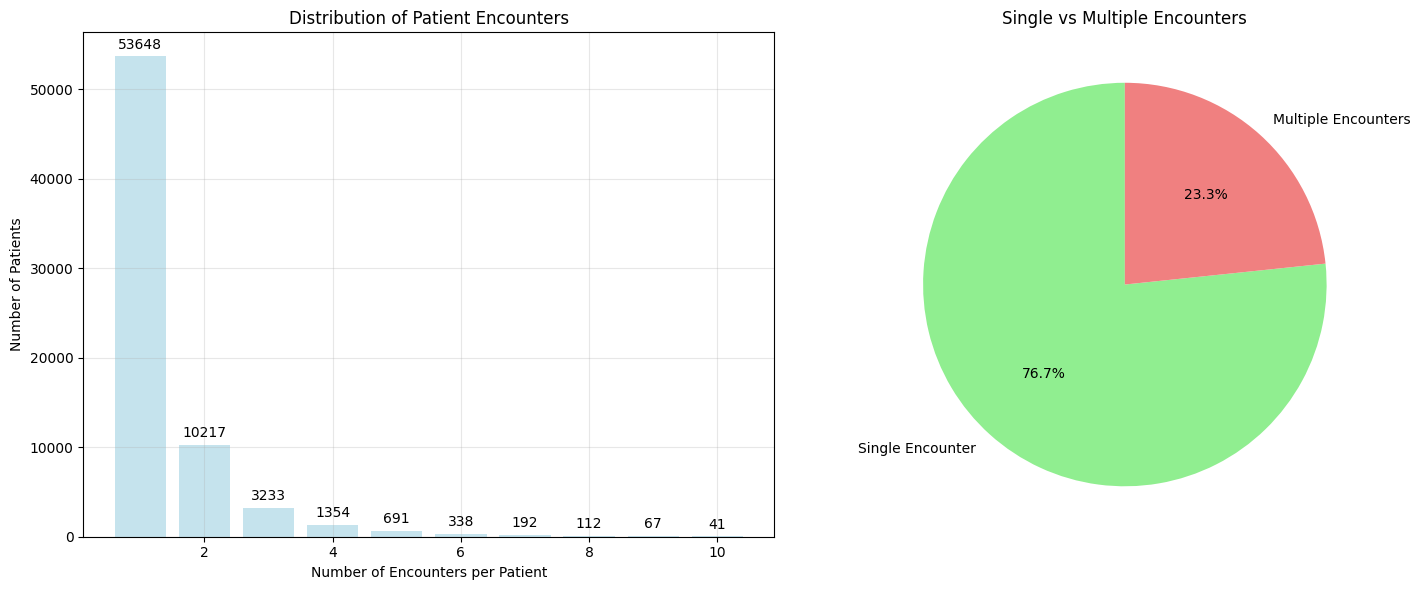


DATA QUALITY SUMMARY:
  23.3% of patients have multiple encounters
  No exact duplicate rows found


In [81]:
def analyze_duplicates(df):
    print("\n" + "="*50)
    print("DUPLICATE ANALYSIS")
    print("="*50)
    
    # Check for exact duplicates
    duplicate_rows = df.duplicated().sum()
    print(f"Exact duplicate rows: {duplicate_rows:,}")
    
    # Check for duplicate patient encounters
    if 'patient_nbr' in df.columns:
        duplicate_patients = df['patient_nbr'].duplicated().sum()
        unique_patients = df['patient_nbr'].nunique()
        
        print(f"Duplicate patient numbers: {duplicate_patients:,}")
        print(f"Unique patients: {unique_patients:,}")
        print(f"Total encounters: {len(df):,}")
        print(f"Average encounters per patient: {len(df)/unique_patients:.2f}")
        
        # Patients with multiple encounters
        patient_encounters = df['patient_nbr'].value_counts()
        multiple_encounters = (patient_encounters > 1).sum()
        
        print(f"Patients with multiple encounters: {multiple_encounters:,}")
        print(f"Patients with single encounter: {unique_patients - multiple_encounters:,}")
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Distribution of encounters per patient
        encounter_dist = patient_encounters.value_counts().sort_index()
        encounter_dist_limited = encounter_dist.head(10)  # Show up to 10 encounters
        
        axes[0].bar(encounter_dist_limited.index, encounter_dist_limited.values, 
                   color='lightblue', alpha=0.7)
        axes[0].set_xlabel('Number of Encounters per Patient')
        axes[0].set_ylabel('Number of Patients')
        axes[0].set_title('Distribution of Patient Encounters')
        axes[0].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(encounter_dist_limited.values):
            axes[0].text(encounter_dist_limited.index[i], v + max(encounter_dist_limited.values)*0.01, 
                        str(v), ha='center', va='bottom')
        
        # Single vs Multiple encounters
        single_vs_multiple = [unique_patients - multiple_encounters, multiple_encounters]
        labels = ['Single Encounter', 'Multiple Encounters']
        
        axes[1].pie(single_vs_multiple, labels=labels, autopct='%1.1f%%', 
                   colors=['lightgreen', 'lightcoral'], startangle=90)
        axes[1].set_title('Single vs Multiple Encounters')
        
        plt.tight_layout()
        plt.show()
        
        # Data quality summary
        print(f"\nDATA QUALITY SUMMARY:")
        if multiple_encounters > 0:
            multiple_pct = (multiple_encounters / unique_patients) * 100
            print(f"  {multiple_pct:.1f}% of patients have multiple encounters")
        
        if duplicate_rows > 0:
            print(f"  {duplicate_rows:,} exact duplicate rows found")
        else:
            print(f"  No exact duplicate rows found")
    
    return duplicate_rows, unique_patients if 'patient_nbr' in df.columns else None

# Run duplicate analysis
if df is not None:
    duplicates, unique_patients = analyze_duplicates(df)

In [82]:
# Pick only the first encounter for each patient with multiple encounters
if df is not None and unique_patients is not None:
    df = df.sort_values(by='encounter_id').drop_duplicates(subset='patient_nbr', keep='first').copy()
    print(f"\nFiltered dataset to first encounter for each patient. New row count: {len(df):,}")


Filtered dataset to first encounter for each patient. New row count: 69,988


In [83]:
# Final dataset shape and summary
if df is not None:
    print(f"\nFinal dataset shape: {df.shape}")
    print("Final dataset summary:")
    print(df.describe(include='all').transpose())


Final dataset shape: (69988, 55)
Final dataset summary:
                            count unique                 top   freq  \
encounter_id              69988.0    NaN                 NaN    NaN   
patient_nbr               69988.0    NaN                 NaN    NaN   
race                        69988      6           Caucasian  52303   
gender                      69988      3              Female  37239   
age                         69988     10             [70-80)  17750   
admission_type_id         69988.0    NaN                 NaN    NaN   
discharge_disposition_id  69988.0    NaN                 NaN    NaN   
admission_source_id       69988.0    NaN                 NaN    NaN   
time_in_hospital          69988.0    NaN                 NaN    NaN   
num_lab_procedures        69988.0    NaN                 NaN    NaN   
num_procedures            69988.0    NaN                 NaN    NaN   
num_medications           69988.0    NaN                 NaN    NaN   
number_outpatient   